# Quiz 1 Programming Activity
---

## Q2 - Resume Analysis
--- 

### Task 1: Personal Resume Activity
--- 

In [2]:
# importing libraries, these must be installed (i did it with pip) into the environment 
# which you're working on (im using .venv for this project)

import matplotlib.pyplot as plt
from collections import Counter
import requests # used for HTTP GET request, downloading stopwords 
import re # regular expressions library, standard for python
import PyPDF2 # used for reading pdf's 
import os # making directory for resume collection

In [11]:
# loading stop words URL into a list once, to be used across the tasks
stopwords_url = "https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords"
stopWords = requests.get(stopwords_url).text.splitlines() # (HTTP GET) fetching the stopWords list as text, splitting on newlines -> list

In [12]:
# function loading resume text from pdf, will be used now for personal resume task as well as later for the 
# group resume task
def resumeProcessor(pdfPath):
    resumeText = ""
    with open(pdfPath, "rb") as f:
        reader = PyPDF2.PdfReader(f) #whole pdf doc
        for page in reader.pages: # .pages are each page in pdf 
            resumeText += page.extract_text() + " " # adding every word to a string, making sure to not concatenate and jam pages together
    # regex to capture only words
    resumeWords = re.findall(r"\b[a-zA-Z]+\b", resumeText.lower()) # captures one or more letters in the alphabet from resumeText (lowercase)
    # removing stopWords from resumeWords -> specificWords
    specificWords = []
    for w in resumeWords:
        if w not in stopWords:
            specificWords.append(w) # adding words that are not in stopWords to specificWords
    
    return resumeWords, specificWords # returns both in one function

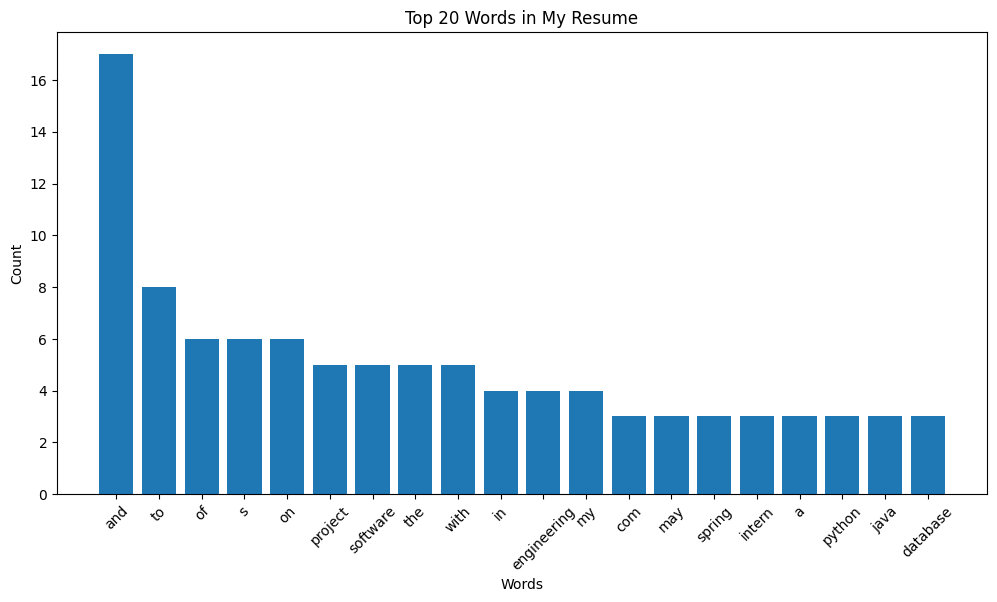

In [13]:
# plotting top 20 words before "stop words" are removed
resumeWords = resumeProcessor("gormanct_resume9.16.25.pdf")[0] # captures the first output (resumeWords)
persWordCounts = Counter(resumeWords) # Counter from collections, wordCounts dict-like obj, maps word to freq/count
top20 = persWordCounts.most_common(20) # top20 is list of tuples, words and their freq
words,counts = zip(*top20) # splits the tuples, * is unpacking operator, zip usually pairs tuples, * "unpacks"

plt.figure(figsize=(12,6)) #12 by 6 representation
plt.bar(words, counts)
plt.xticks(rotation=45) # so the labels of the words dont cover each other
plt.title("Top 20 Words in My Resume")
plt.xlabel("Words")
plt.ylabel("Count")
plt.show()


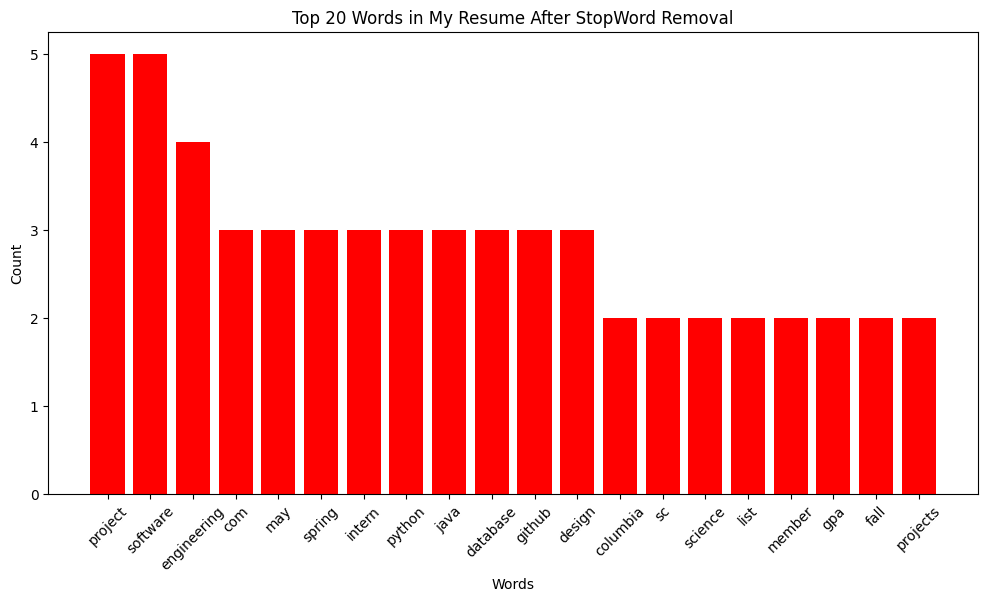

In [14]:
# plotting top 20 words after "stopWords" are removed, similarly to above
persSpecificWords = resumeProcessor("gormanct_resume9.16.25.pdf")[1] # captures specificWords from function
persFilteredCountList = Counter(persSpecificWords)
top20Filtered = persFilteredCountList.most_common(20)
filteredWords,filteredCounts = zip(*top20Filtered)

plt.figure(figsize=(12,6))
plt.bar(filteredWords,filteredCounts, color="red")
plt.xticks(rotation=45)
plt.title("Top 20 Words in My Resume After StopWord Removal")
plt.xlabel("Words")
plt.ylabel("Count")
plt.show()

### Task 1 Analysis
> The removal of the stop words was definitely helpful in filtering unnecessary words. I'm not sure it was helpful in revealing more about me, as I'm not sure this is the best method for finding more out about possible job hirees. 
---


### Task 2: Group Resume Activity
--- 

In [17]:
# new import to download resumes on google drive 
# must be installed (i did it with pip) into the environment 
# which you're working on (im using .venv for this project)
import gdown
import os

In [26]:
# downloading all resumes into a resumes directory
driveLink = "https://drive.google.com/drive/folders/1F6HRaliFWcakVvT605m8Js6a1D40Tx24"
os.makedirs("resumes", exist_ok=True) # making directory for resumes to 'land' in
gdown.download_folder(driveLink, output="resumes", quiet=False,use_cookies=False, remaining_ok=True, resume=True) # from gdown, want to show progress of downloads, 
# doesn't use my cookies data, remaining_ok tells gdown to keep whatever files are already downloaded, skip missing ones instead of failing,
# having issues with all of the resumes being downloaded, resume flag tells gdown to continue downloading partially downloaded files

Retrieving folder contents


Processing file 19UEYAqforRFDEwX1NuQGc6uNLOo8zkVI Aashish Jayapuram Resume_Revised.pdf
Processing file 1zu5mNGLDYmWVEuk8K0pqmip_18t1owIy AidanVanVoorhis_2025_Resume.pdf
Processing file 1KmRK-Ih_pIESFKaerwS-JOWU9TZWCoC7 Ardoine_Docteur_Resume.pdf
Processing file 1mGuYkuPYNs3h3WQVe79iiXFocKsXhVjq Camron Martin Resume.pdf
Processing file 1dNORwUBsXKnITH0H1RAg1mxyJikMVuqG Charlie Gorman Resume 2025.pdf
Processing file 1ImW6c5f2T62YKXqns59vlOcci8OHO4kz Cody Miller - Resume.pdf
Processing file 1BKt0nTyDV7pXcZmVgMEUcvCM2eyCDE5N Copy of Nathan Nicodin Resume.pdf
Processing file 10J6BZDZrC2dxEEfAK40myVW5bjRxvSYP David_Dinh_Resume_2026WOGPA.pdf
Processing file 15rp54TE62fk0BchfbuGkOSqk_78sMdUZ DJ Ravenell’s Resume.pdf
Processing file 1KvrpYO8NhQwYsoZ9u3nLcw0RzD4fVAIu Dustin_McDowell_Resume.pdf
Processing file 1R5vGipAoz5KbTnFYuyO5qwBDOZo8R-Ba Eli_Hatcher_resume.pdf
Processing file 1pUQf61wfrJpnLVuMr-ntAywfME_31jMu FINAL Resume- IT Intership.pdf
Processing file 1ZcEXTIM4TnlZ3bRAo2cw-9GEhuAJLEvk J

Retrieving folder contents completed
Building directory structure
Building directory structure completed


FileURLRetrievalError: Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=19UEYAqforRFDEwX1NuQGc6uNLOo8zkVI

but Gdown can't. Please check connections and permissions.

In [ ]:
# aggregating all words from all resumes into a list of strings (one string / resume)
allResumeWords = [] 
allSpecificWords = [] 

for file in os.listdir("resumes"):
    if file.endswith(".pdf"):
        resumePath = os.path.join("resumes", file) # i.e. /resumes/resume1.pdf
        resumeWords, specificWords = resumeProcessor(resumePath) # returns both
        allResumeWords.extend(resumeWords)
        allSpecificWords.extend(specificWords)

In [ ]:
# plotting top 20 cumulative words before 'stopWords' removed
groupAllWordCount = Counter(allResumeWords)
top20groupAll = groupAllWordCount.most_common(20)

if top20groupAll: #only runs if list is not empty
    wordsGroup, countsGroup = zip(*top20groupAll)
    plt.figure(figsize=(12,6))
    plt.bar(wordsGroup, countsGroup)
    plt.xticks(rotation=45)
    plt.title("Top 20 Words Across All Resumes (StopWords included)")
    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.show()

In [ ]:
# plotting top 20 cumulative words after 'stopWords' removed
groupSpecificWordCount = Counter(allSpecificWords)
top20groupSpecific = groupSpecificWordCount.most_common(20)

if top20groupSpecific:
    filteredWordsGroup, filteredCountsGroup = zip(*top20groupSpecific)
    plt.figure(figsize=(12,6))
    plt.bar(filteredWordsGroup, filteredCountsGroup)
    plt.xticks(rotation=45)
    plt.title("Top 20 Words Across All Resumes (StopWords included)")
    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.show()

### Task 2 Analysis / TASK 3
>  WWWWWW
---

## Q3 - Data Analysis for Social Impact
--- 

### a) Data Issues
--- 

### b) Exploratory Data Analysis
--- 

### c) Unsupervised Learning
--- 